In [62]:
from search_utils import (
    query_dblp_api,
    retrieve_data_from_dblp_response,
    find_conference_rank,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Search for the two query terms and concatenate the results

In [63]:
response = query_dblp_api("disentangled autoencoder")
# response2 = query_dblp_api("disentangled representation")
response3 = query_dblp_api("deforming autoencoder")
response2 = query_dblp_api("beta VAE")

result2 = retrieve_data_from_dblp_response(response2)
result = retrieve_data_from_dblp_response(response)
result = pd.concat([result, retrieve_data_from_dblp_response(response2), result2])
print("Number of search results: ", len(result))

Number of search results:  712


Filter the relevant years first

In [64]:
results_relevant_years = result[result["year"].astype(int) > 2017]
print("After year filter: ", len(results_relevant_years))

After year filter:  391


and then find the rank for all the conferences

In [65]:
ranks = pd.DataFrame(columns=["venue", "rank"])
for venue in results_relevant_years["venue"].unique():
    rank = find_conference_rank(venue)
    if isinstance(rank, str):
        ranks = pd.concat([ranks, pd.DataFrame({"rank": [rank], "venue": [venue]})])

display(ranks)

No rank found for venue:  ICAART (Revised Selected Paper
missing ), unterminated subpattern at position 9


,venue,rank
0,AAAI,A*
0,WACV,A
0,CoRR,Z
0,Expert Syst. Appl.,Z
0,Inf.,Z
...,...,...
0,CVPR Workshops,Z
0,Bioinform.,Z
0,Neurocomputing,Z
0,ECONVN,Z


merge conference ranks

In [66]:
full_results = pd.merge(ranks, results_relevant_years, on="venue")
display(full_results.head(2))
display(full_results.tail(2))

,venue,rank,title,authors,year,doi
0,AAAI,A*,Factorized Diffusion Autoencoder for Unsupervi...,"Ancong Wu, Wei-Shi Zheng 0001",2024,10.1609/AAAI.V38I6.28407
1,AAAI,A*,Counterfactual Fairness with Disentangled Caus...,"Hyemi Kim, Seungjae Shin, JoonHo Jang, Kyungwo...",2021,10.1609/AAAI.V35I9.16990


,venue,rank,title,authors,year,doi
389,IST,Z,Application of Beta Random Variables to Catego...,"Hadi Kalamati, Mohammad-R. Akbarzadeh-T., Sayy...",2018,10.1109/ISTEL.2018.8661079
390,IST,Z,Application of Beta Random Variables to Catego...,"Hadi Kalamati, Mohammad-R. Akbarzadeh-T., Sayy...",2018,10.1109/ISTEL.2018.8661079


Filter based conferences better than B

In [67]:
filtered_results = full_results[(full_results["rank"] < "C")]

filtered_results.drop_duplicates(inplace=True)
print(len(filtered_results))
display(filtered_results)

30


C:\Users\I567766\AppData\Local\Temp\ipykernel_28632\514537463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results.drop_duplicates(inplace=True)


,venue,rank,title,authors,year,doi
0,AAAI,A*,Factorized Diffusion Autoencoder for Unsupervi...,"Ancong Wu, Wei-Shi Zheng 0001",2024,10.1609/AAAI.V38I6.28407
1,AAAI,A*,Counterfactual Fairness with Disentangled Caus...,"Hyemi Kim, Seungjae Shin, JoonHo Jang, Kyungwo...",2021,10.1609/AAAI.V35I9.16990
2,AAAI,A*,Multi-Level Variational Autoencoder: Learning ...,"Diane Bouchacourt, Ryota Tomioka, Sebastian No...",2018,10.1609/AAAI.V32I1.11867
3,AAAI,A*,Probabilistic Logic Programming with Beta-Dist...,"Federico Cerutti 0001, Lance M. Kaplan, Angeli...",2019,10.1609/AAAI.V33I01.33017769
5,WACV,A,Hierarchical Diffusion Autoencoders and Disent...,"Zeyu Lu, Chengyue Wu, Xinyuan Chen, Yaohui Wan...",2024,10.1109/WACV57701.2024.00529
6,WACV,A,Information Bottlenecked Variational Autoencod...,"Hao Sun, Nick E. Pears, Yajie Gu",2022,10.1109/WACV51458.2022.00239
101,CVPR,A*,Diffusion Video Autoencoders: Toward Temporall...,"Gyeongman Kim, Hajin Shim, Hyunsu Kim, Yunjey ...",2023,10.1109/CVPR52729.2023.00590
102,ECAI,A,Causally Disentangled Generative Variational A...,"SeungHwan An, Kyungwoo Song, Jong-June Jeon",2023,10.3233/FAIA230258
106,FG,B,DisVAE: Disentangled Variational Autoencoder f...,"Tianhao Wang 0024, Mingyue Zhang, Lin Shang 0001",2023,10.1109/FG57933.2023.10042668
108,ICME,A,A Disentangled Recurrent Variational Autoencod...,"Hegen Yan, Zhihua Lu",2023,10.1109/ICME55011.2023.00292


In [69]:
filtered_results.sort_values(by="year", ascending=False).to_csv(
    "survey_disentangled.csv", index=False
)

In [73]:
full_data = pd.read_csv("survey_disentangled.csv", sep=";")
full_data.head(3)

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
0,AAAI,A*,Factorized Diffusion Autoencoder for Unsupervi...,"Ancong Wu, Wei-Shi Zheng 0001",2024,10.1609/AAAI.V38I6.28407,Image,Research,content mask factorization,NaN
1,WACV,A,Hierarchical Diffusion Autoencoders and Disent...,"Zeyu Lu, Chengyue Wu, Xinyuan Chen, Yaohui Wan...",2024,10.1109/WACV57701.2024.00529,Image,Image editing,hierarchical disentanglement of low-level and ...,NaN
2,SMC,B,A Beta-Less Approach for Vehicle Cornering Sti...,"Kelvin Wittmer, Kay-Uwe Henning, Oliver Sawodny",2023,10.1109/SMC53992.2023.10394015,NaN,NaN,NaN,NaN


In [76]:
print(full_data["subfield AI"].value_counts())

subfield AI
Image               11
Audio / Video        5
Multiple             2
Protein Sequence     1
Tabular              1
Time Series          1
RNA sequences        1
Name: count, dtype: int64


In [77]:
full_data[full_data["subfield AI"] == "Image"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
0,AAAI,A*,Factorized Diffusion Autoencoder for Unsupervi...,"Ancong Wu, Wei-Shi Zheng 0001",2024,10.1609/AAAI.V38I6.28407,Image,Research,content mask factorization,NaN
1,WACV,A,Hierarchical Diffusion Autoencoders and Disent...,"Zeyu Lu, Chengyue Wu, Xinyuan Chen, Yaohui Wan...",2024,10.1109/WACV57701.2024.00529,Image,Image editing,hierarchical disentanglement of low-level and ...,NaN
5,FG,B,DisVAE: Disentangled Variational Autoencoder f...,"Tianhao Wang 0024, Mingyue Zhang, Lin Shang 0001",2023,10.1109/FG57933.2023.10042668,Image,human-computer interaction,disentangle identity and expression from 3d fa...,NaN
7,ICML,A*,Orthogonality-Enforced Latent Space in Autoenc...,"Jaehoon Cha, Jeyan Thiyagalingam",2023,NaN,Image,Research,Non-probabilistic disentangling (w/o prior),NaN
15,ICIP,B,Disentangled Sequential Autoencoder with Local...,"Yuxuan Si, Zhengqing Fang, Kun Kuang, Zhengxin...",2022,10.1109/ICIP46576.2022.9897646,Image,Medical Diagnosis,disentangle time-dependent from content featur...,NaN
16,WACV,A,Information Bottlenecked Variational Autoencod...,"Hao Sun, Nick E. Pears, Yajie Gu",2022,10.1109/WACV51458.2022.00239,Image,Research,disentangle identity and expression from 3d fa...,NaN
19,AAAI,A*,Counterfactual Fairness with Disentangled Caus...,"Hyemi Kim, Seungjae Shin, JoonHo Jang, Kyungwo...",2021,10.1609/AAAI.V35I9.16990,Image,Fair decision-making,separate factors for decision-making to remove...,NaN
20,MICCAI,A,Disentangled Sequential Graph Autoencoder for ...,"Fan Yang, Rui Meng, Hyuna Cho, Guorong Wu 0001...",2021,10.1007/978-3-030-87196-3_34,Image,Neuroscience,disentangle time-dependent from content featur...,NaN
22,ICML,A*,Demystifying Inductive Biases for (Beta-)VAE B...,"Dominik Zietlow, Michal Rolínek, Georg Martius",2021,NaN,Image,Research,Understand inductive bias of disentangled VAE ...,NaN
24,MICCAI,A,Disentangled Intensive Triplet Autoencoder for...,"Dan Hu, Fan Wang, Han Zhang 0002, Zhengwang Wu...",2020,10.1007/978-3-030-59728-3_8,Image,Neuroscience,Understand functioning of brain,NaN


In [78]:
full_data[full_data["subfield AI"] == "Audio / Video"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
3,CVPR,A*,Diffusion Video Autoencoders: Toward Temporall...,"Gyeongman Kim, Hajin Shim, Hyunsu Kim, Yunjey ...",2023,10.1109/CVPR52729.2023.00590,Audio / Video,Face video editing,disentangle time-dependent from content featur...,NaN
6,ICME,A,A Disentangled Recurrent Variational Autoencod...,"Hegen Yan, Zhihua Lu",2023,10.1109/ICME55011.2023.00292,Audio / Video,Speech enhancement,Extract clean speech from noisy mixture,NaN
18,ICLR,A*,Disentangled Recurrent Wasserstein Autoencoder.,"Jun Han, Martin Renqiang Min, Ligong Han, Li E...",2021,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN
21,NeurIPS,A*,Contrastively Disentangled Sequential Variatio...,"Junwen Bai, Weiran Wang, Carla P. Gomes",2021,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN
28,ICML,A*,Disentangled Sequential Autoencoder.,"Yingzhen Li, Stephan Mandt",2018,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN


In [79]:
full_data[full_data["subfield AI"] == "Multiple"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
4,ECAI,A,Causally Disentangled Generative Variational A...,"SeungHwan An, Kyungwoo Song, Jong-June Jeon",2023,10.3233/FAIA230258,Multiple,Research,disentangle causally independent features,NaN
26,IJCAI,A*,Disentangled Variational Autoencoder based Mul...,"Junwen Bai, Shufeng Kong, Carla P. Gomes",2020,10.24963/IJCAI.2020/595,Multiple,Research,multi label classification,NaN


In [80]:
full_data[full_data["subfield AI"] == "Tabular"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
10,ICLR,A*,$\beta$-Intact-VAE: Identifying and Estimating...,"Pengzhou Abel Wu, Kenji Fukumizu",2022,NaN,Tabular,Medical Diagnosis,identification of treatment effects in medical...,NaN


In [84]:
full_data[full_data["subfield AI"] == "Time Series "]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
12,ICAART,B,Time Series Augmentation based on Beta-VAE to ...,"Domen Kavran, Borut Zalik, Niko Lukac",2022,10.5220/0010749200003116,Time Series,Research,Time series augmentation for classification pe...,NaN


In [87]:
full_data[full_data["subfield AI"] == "Protein Sequence"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
9,NeurIPS,A*,Disentangled Wasserstein Autoencoder for T-Cel...,"Tianxiao Li, Hongyu Guo, Filippo Grazioli, Mar...",2023,NaN,Protein Sequence,Biotech,Disentangle cell structure from function,NaN


In [88]:
full_data[full_data["subfield AI"] == "RNA sequences"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
13,PRICAI,B,VaeSSC: Enhanced GRN Inference with Structural...,"Hongmin Zhang, Ming Shi, Zhongwei Huang, Zhi Y...",2022,10.1007/978-981-99-7019-3_41,RNA sequences,Biotech,learn disentangled representation of grouped data,NaN


In [91]:
full_data[full_data["application domain"] == "Research"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
0,AAAI,A*,Factorized Diffusion Autoencoder for Unsupervi...,"Ancong Wu, Wei-Shi Zheng 0001",2024,10.1609/AAAI.V38I6.28407,Image,Research,content mask factorization,NaN
4,ECAI,A,Causally Disentangled Generative Variational A...,"SeungHwan An, Kyungwoo Song, Jong-June Jeon",2023,10.3233/FAIA230258,Multiple,Research,disentangle causally independent features,NaN
7,ICML,A*,Orthogonality-Enforced Latent Space in Autoenc...,"Jaehoon Cha, Jeyan Thiyagalingam",2023,NaN,Image,Research,Non-probabilistic disentangling (w/o prior),NaN
12,ICAART,B,Time Series Augmentation based on Beta-VAE to ...,"Domen Kavran, Borut Zalik, Niko Lukac",2022,10.5220/0010749200003116,Time Series,Research,Time series augmentation for classification pe...,NaN
16,WACV,A,Information Bottlenecked Variational Autoencod...,"Hao Sun, Nick E. Pears, Yajie Gu",2022,10.1109/WACV51458.2022.00239,Image,Research,disentangle identity and expression from 3d fa...,NaN
18,ICLR,A*,Disentangled Recurrent Wasserstein Autoencoder.,"Jun Han, Martin Renqiang Min, Ligong Han, Li E...",2021,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN
21,NeurIPS,A*,Contrastively Disentangled Sequential Variatio...,"Junwen Bai, Weiran Wang, Carla P. Gomes",2021,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN
22,ICML,A*,Demystifying Inductive Biases for (Beta-)VAE B...,"Dominik Zietlow, Michal Rolínek, Georg Martius",2021,NaN,Image,Research,Understand inductive bias of disentangled VAE ...,NaN
26,IJCAI,A*,Disentangled Variational Autoencoder based Mul...,"Junwen Bai, Shufeng Kong, Carla P. Gomes",2020,10.24963/IJCAI.2020/595,Multiple,Research,multi label classification,NaN
28,ICML,A*,Disentangled Sequential Autoencoder.,"Yingzhen Li, Stephan Mandt",2018,NaN,Audio / Video,Research,disentangle time-dependent from content featur...,NaN


In [93]:
full_data[
    full_data["application domain"].isin(
        ["Medical Diagnosis", "Neuroscience", "Biotech"]
    )
]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
9,NeurIPS,A*,Disentangled Wasserstein Autoencoder for T-Cel...,"Tianxiao Li, Hongyu Guo, Filippo Grazioli, Mar...",2023,NaN,Protein Sequence,Biotech,Disentangle cell structure from function,NaN
10,ICLR,A*,$\beta$-Intact-VAE: Identifying and Estimating...,"Pengzhou Abel Wu, Kenji Fukumizu",2022,NaN,Tabular,Medical Diagnosis,identification of treatment effects in medical...,NaN
13,PRICAI,B,VaeSSC: Enhanced GRN Inference with Structural...,"Hongmin Zhang, Ming Shi, Zhongwei Huang, Zhi Y...",2022,10.1007/978-981-99-7019-3_41,RNA sequences,Biotech,learn disentangled representation of grouped data,NaN
15,ICIP,B,Disentangled Sequential Autoencoder with Local...,"Yuxuan Si, Zhengqing Fang, Kun Kuang, Zhengxin...",2022,10.1109/ICIP46576.2022.9897646,Image,Medical Diagnosis,disentangle time-dependent from content featur...,NaN
20,MICCAI,A,Disentangled Sequential Graph Autoencoder for ...,"Fan Yang, Rui Meng, Hyuna Cho, Guorong Wu 0001...",2021,10.1007/978-3-030-87196-3_34,Image,Neuroscience,disentangle time-dependent from content featur...,NaN
24,MICCAI,A,Disentangled Intensive Triplet Autoencoder for...,"Dan Hu, Fan Wang, Han Zhang 0002, Zhengwang Wu...",2020,10.1007/978-3-030-59728-3_8,Image,Neuroscience,Understand functioning of brain,NaN


In [99]:
full_data[full_data["application domain"].isin(["Image editing", "Face video editing"])]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
1,WACV,A,Hierarchical Diffusion Autoencoders and Disent...,"Zeyu Lu, Chengyue Wu, Xinyuan Chen, Yaohui Wan...",2024,10.1109/WACV57701.2024.00529,Image,Image editing,hierarchical disentanglement of low-level and ...,NaN
3,CVPR,A*,Diffusion Video Autoencoders: Toward Temporall...,"Gyeongman Kim, Hajin Shim, Hyunsu Kim, Yunjey ...",2023,10.1109/CVPR52729.2023.00590,Audio / Video,Face video editing,disentangle time-dependent from content featur...,NaN


In [105]:
full_data[full_data["application domain"] == "Speech enhancement"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
6,ICME,A,A Disentangled Recurrent Variational Autoencod...,"Hegen Yan, Zhihua Lu",2023,10.1109/ICME55011.2023.00292,Audio / Video,Speech enhancement,Extract clean speech from noisy mixture,NaN


In [103]:
full_data[full_data["application domain"] == "human-computer interaction"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
5,FG,B,DisVAE: Disentangled Variational Autoencoder f...,"Tianhao Wang 0024, Mingyue Zhang, Lin Shang 0001",2023,10.1109/FG57933.2023.10042668,Image,human-computer interaction,disentangle identity and expression from 3d fa...,NaN


In [104]:
full_data[full_data["application domain"] == "Fair decision-making"]

,venue,rank,title,authors,year,doi,subfield AI,application domain,use case,current architecture
19,AAAI,A*,Counterfactual Fairness with Disentangled Caus...,"Hyemi Kim, Seungjae Shin, JoonHo Jang, Kyungwo...",2021,10.1609/AAAI.V35I9.16990,Image,Fair decision-making,separate factors for decision-making to remove...,NaN


In [108]:
full_data["use case"].value_counts()

use case
disentangle time-dependent from content features in videos           6
disentangle identity and expression from 3d face models              2
learn disentangled representation of grouped data                    2
content mask factorization                                           1
hierarchical disentanglement of low-level and high-level features    1
disentangle causally independent features                            1
Extract clean speech from noisy mixture                              1
Non-probabilistic disentangling (w/o prior)                          1
Disentangle cell structure from function                             1
identification of treatment effects in medical studies               1
Time series augmentation for classification performance              1
separate factors for decision-making to remove prejudices            1
Understand inductive bias of disentangled VAE architectures          1
Understand functioning of brain                                     

In [110]:
print(len(full_data[full_data["subfield AI"].isna()]))

8


Overall number of papers:  22


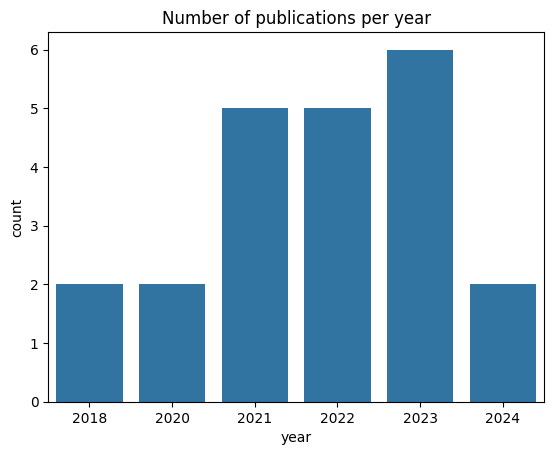

In [137]:
relevant_results = full_data[~full_data["subfield AI"].isna()]
print("Overall number of papers: ", len(relevant_results))
results_per_year = pd.DataFrame(
    relevant_results["year"].value_counts(), columns=["count"]
)
results_per_year.sort_index(inplace=True)

sns.barplot(x=results_per_year.index, y=results_per_year["count"])
plt.title("Number of publications per year")
plt.savefig("per_year.png")
plt.show()

C:\Users\I567766\AppData\Local\Temp\ipykernel_28632\1083908416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_results["conferencerank"] = relevant_results["venue"] + "\n" + relevant_results["rank"]


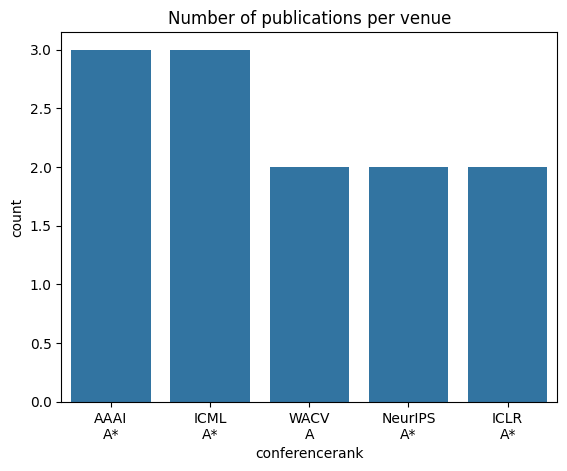

In [151]:
relevant_results["conferencerank"] = (
    relevant_results["venue"] + "\n" + relevant_results["rank"]
)
results_per_venue = pd.DataFrame(
    relevant_results["conferencerank"].value_counts(), columns=["count"]
)
results_per_venue.sort_values(by="count")
# plt.figure(figsize=(30,10))
sns.barplot(x=results_per_venue[:5].index, y=results_per_venue[:5]["count"])
plt.title("Number of publications per venue")
plt.savefig("per_venue.png")
plt.show()